实验目标
学习并掌握如何使用Python进行数据探索与可视化。
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

实验要求
1、使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2、使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
3、对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4、对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5、使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。
6、使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。
7、使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport #生成数据的交互式报告

data = pd.read_csv(r"C:\Users\大头\Desktop\github_bot_processed_data.csv")
pd.set_option('display.max_columns', None) #显示所有列
pd.set_option('display.max_rows', None) #显示所有行
print(data.head())
print(data.info())
print(data.describe())
#日期格式化
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
#对数变换
#用np.log1p(x)去计算log(1+x)，以避免log(0)的情况
data['log_public_repos'] = np.log1p(data['public_repos'])
data['log_public_gists'] = np.log1p(data['public_gists'])
data['log_followers'] = np.log1p(data['followers'])
data['log_following'] = np.log1p(data['following'])

print(data[['public_repos', 'log_public_repos']].head())








   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。

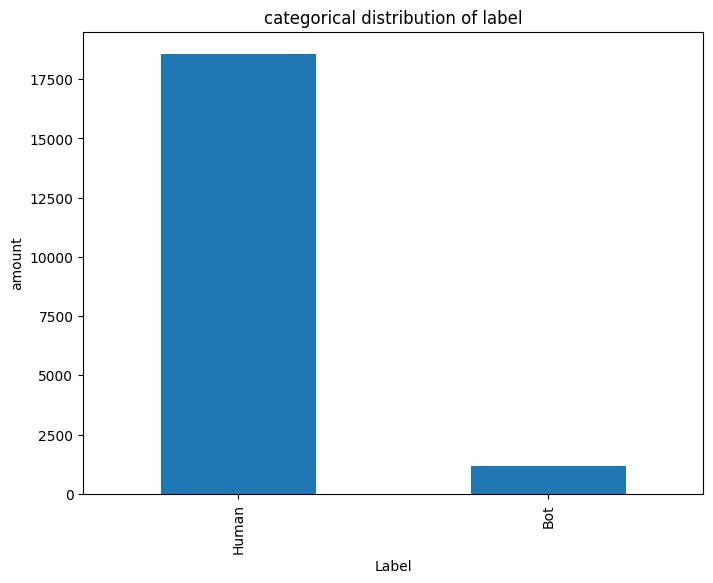

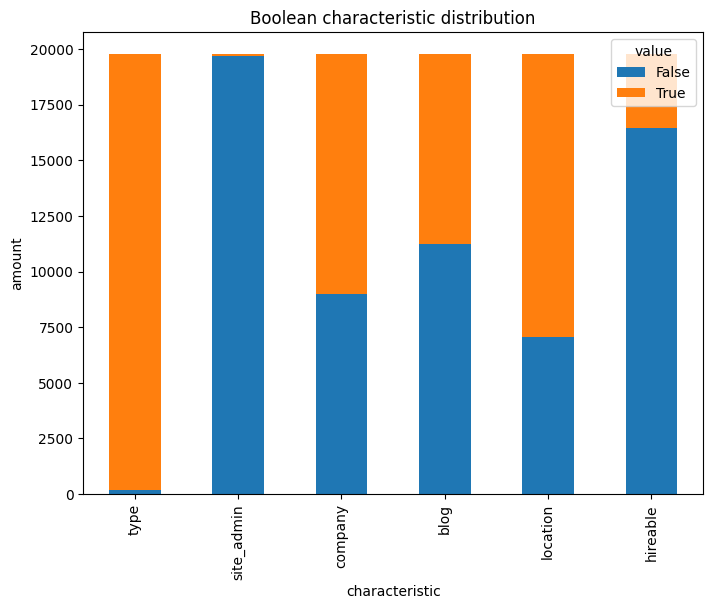

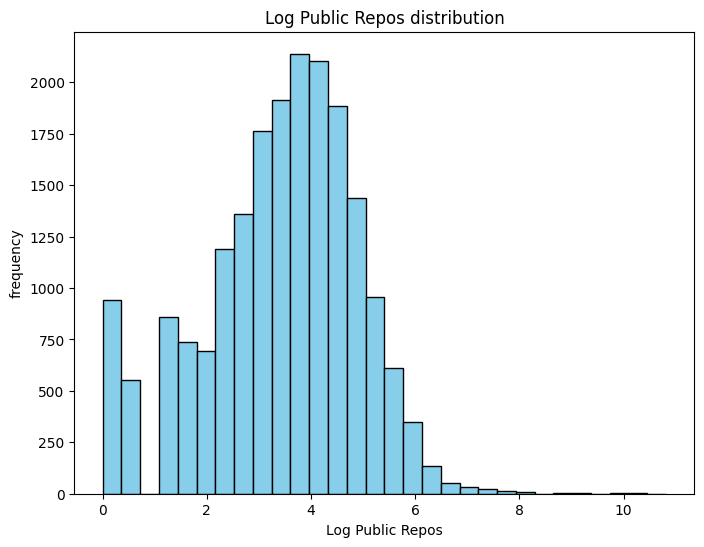

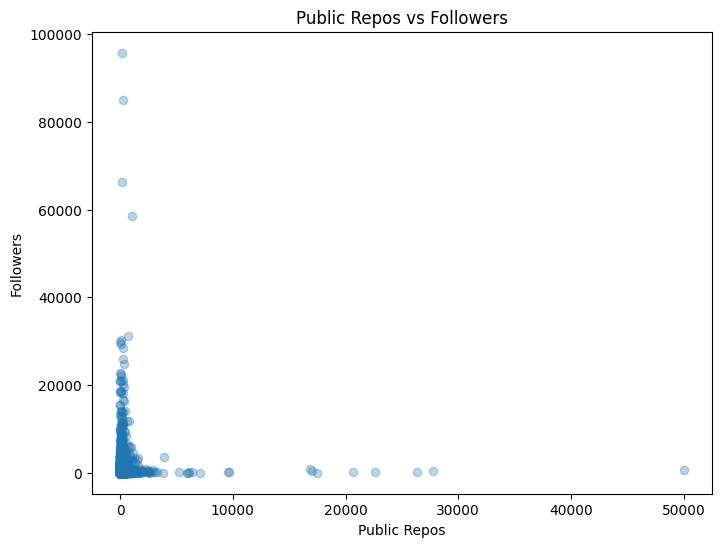

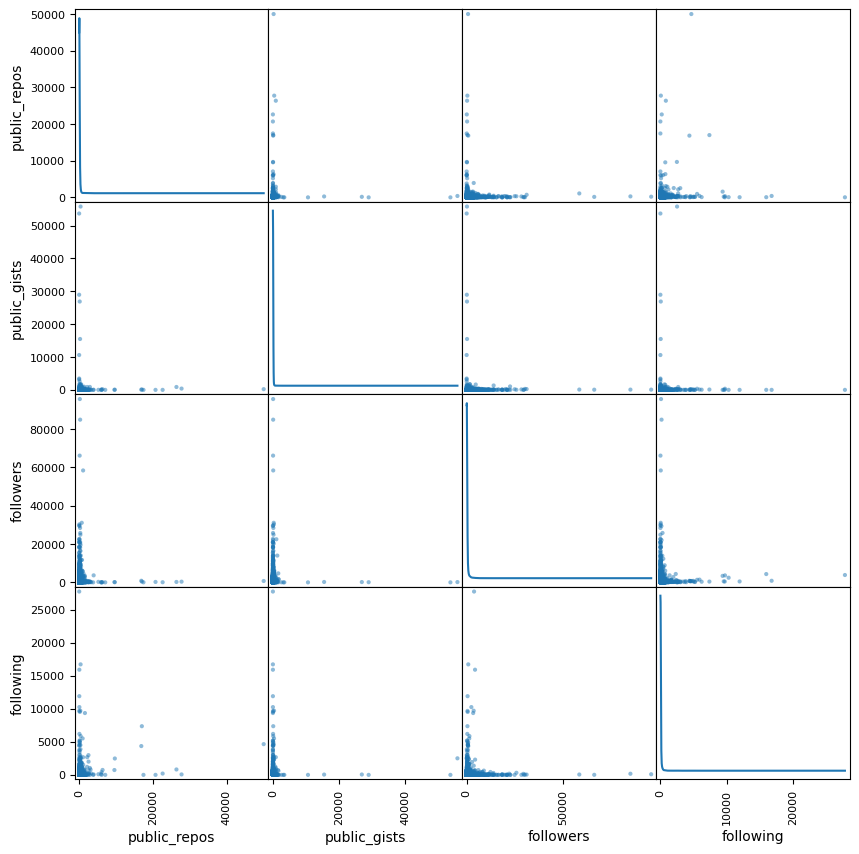

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from ydata_profiling import ProfileReport #生成数据的交互式报告
data = pd.read_csv(r"C:\Users\大头\Desktop\github_bot_processed_data.csv")
#条形图
label_counts = data['label'].value_counts()
plt.figure(figsize=(8,6))
label_counts.plot(kind='bar')
plt.title('categorical distribution of label')
plt.xlabel('Label')
plt.ylabel('amount')
plt.show()

#堆积柱状图
#先从csv文件里面把Bool类型的数据提取出来
bool_features = ['type','site_admin', 'company','blog','location','hireable']
bool_counts = data[bool_features].apply(lambda x: x.value_counts()).T #转置一下，方便数据对齐
bool_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Boolean characteristic distribution')
plt.xlabel('characteristic')
plt.ylabel('amount')
plt.legend(title='value', loc='upper right')
plt.show()

#直方图
data['log_public_repos'] = np.log1p(data['public_repos'])
plt.figure(figsize=(8,6))
plt.hist(data['log_public_repos'], bins=30, color='skyblue', edgecolor='black')
plt.title('Log Public Repos distribution')
plt.xlabel('Log Public Repos')
plt.ylabel('frequency')
plt.show()

#散点图
plt.figure(figsize=(8,6))
plt.scatter(data['public_repos'], data['followers'], alpha=0.3) #透明度高了就看不出来了
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

#散点图矩阵
from pandas.plotting import scatter_matrix
numerical_features = ['public_repos', 'public_gists', 'followers', 'following']
scatter_matrix(data[numerical_features], figsize=(10,10), diagonal='kde')
plt.show()




使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。

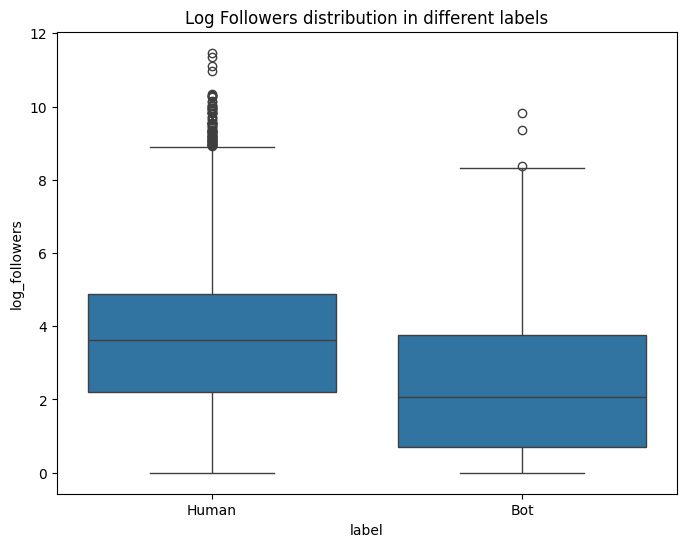

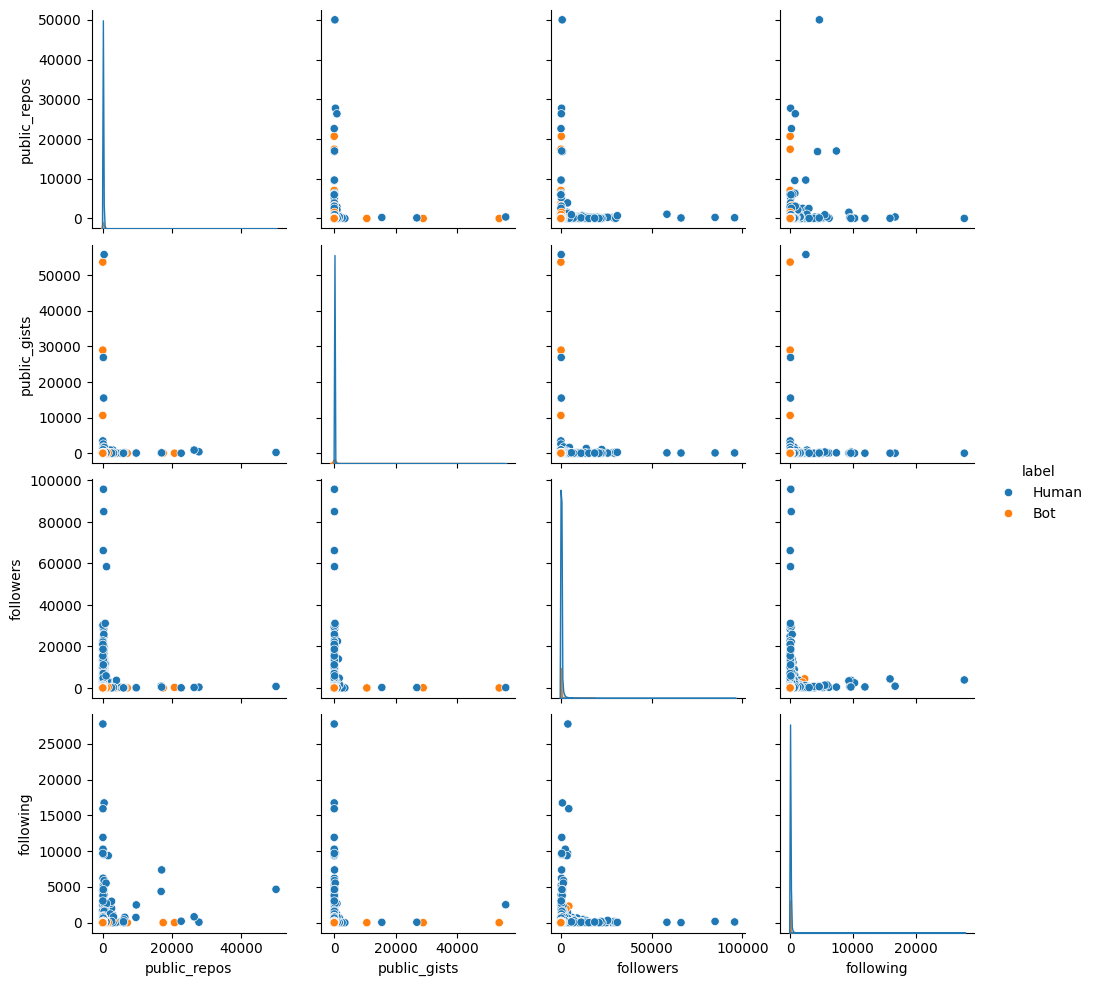

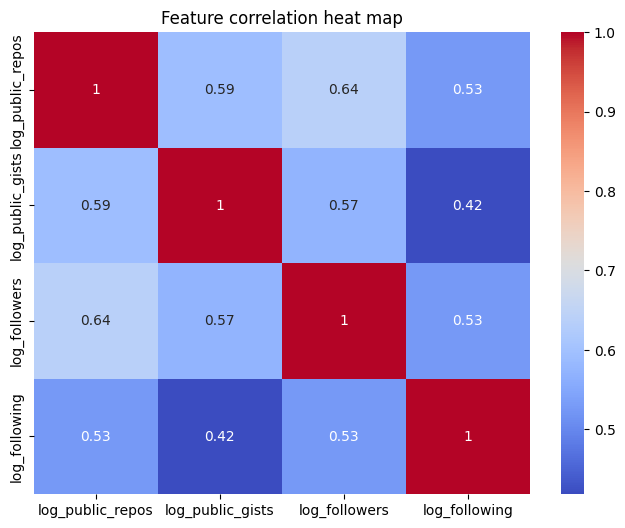

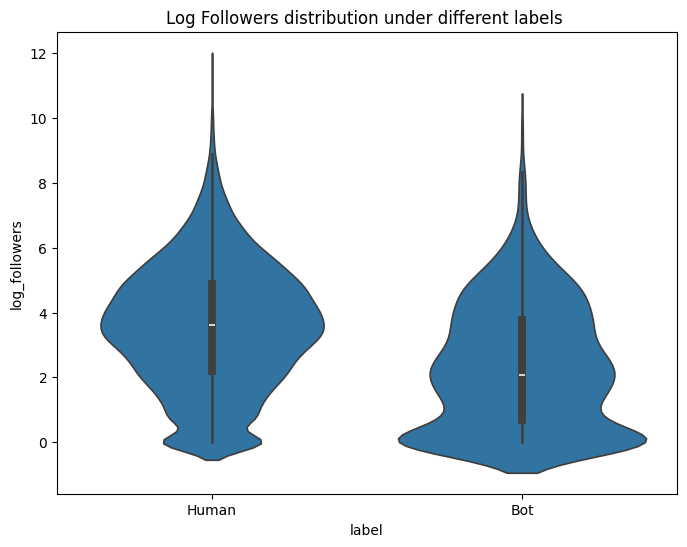

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from ydata_profiling import ProfileReport #生成数据的交互式报告
data = pd.read_csv(r"C:\Users\大头\Desktop\github_bot_processed_data.csv")
data['log_public_repos'] = np.log1p(data['public_repos'])
data['log_public_gists'] = np.log1p(data['public_gists'])
data['log_followers'] = np.log1p(data['followers'])
data['log_following'] = np.log1p(data['following'])
#箱线图
plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log Followers distribution in different labels')
plt.show()

#成对图
#sns.pairplot()：绘制成对关系图，自动生成数值变量之间的散点图
sns.pairplot(data[numerical_features + ['label']], hue='label')
plt.show()

#热力图
corr_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
corr = data[corr_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature correlation heat map')
plt.show()

#小提琴
plt.figure(figsize=(8,6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Log Followers distribution under different labels ')
plt.show()


使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [22]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport #生成数据的交互式报告
# 生成报告
profile = ProfileReport(data, title='GitHub Bot Data Profiling Report', explorative=True)
profile.to_file('github_bot_data_report.html')
# 在Jupyter Notebook中直接显示报告
profile.to_notebook_iframe()


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.09it/s]
